## Observations and Insights 
- Among all the different drug regimens, Capomulin was the msot effective, with Ramicane following close behind.
  All the other drugs were'nt doing as well as those two.
- From all the data, only one outlier was found.  The data is consistent with it's results.  
- According to the scatterplot, heavier mice were less affected by the drug, due to their tumor volumes staying at a 
  higher amount despite all the drug regimens.  

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse = mouse_metadata.merge(study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
mouse.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new = mouse[["Mouse ID", "Timepoint"]]
mouse["Mouse ID"].value_counts()

g989    13
c264    10
o562    10
c139    10
c559    10
        ..
o848     1
n482     1
b447     1
x336     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 

In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse.drop_duplicates(subset=["Mouse ID"])
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mice.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_drug = mouse.groupby("Drug Regimen")

mice_mean = group_drug["Tumor Volume (mm3)"].mean()
mice_median = group_drug["Tumor Volume (mm3)"].median()
mice_stdev = group_drug["Tumor Volume (mm3)"].std()
mice_sem = group_drug["Tumor Volume (mm3)"].sem()
mice_var = mice_sem ** 2
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mice_grouped_df = pd.DataFrame({'Mean': mice_mean, 'Median': mice_median,
                                'Standard Deviation': mice_stdev, 'SEM': mice_sem})

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_grouped_df
# Using the aggregation method, produce the same summary statistics in a single line

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

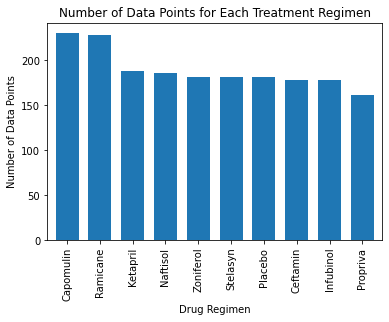

In [58]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = mouse['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
#setting labels for the axis and title
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

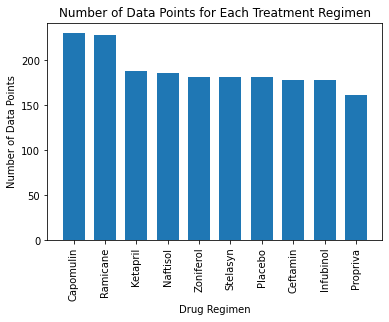

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = mouse['Drug Regimen'].value_counts()
x_axis = np.arange(len(drugs))
plt.bar(x_axis, drugs, width = 0.7)
#setting the names for the x axis using the names under drugs
tick_locations = [value for value in x_axis]
#setting the usual titles and axis names
plt.xticks(tick_locations, drugs.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')
plt.show()

Text(0, 0.5, '')

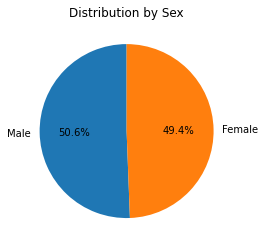

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = mouse["Sex"].value_counts()
pie_plot = sex_data.plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Distribution by Sex")
#this gets rid of a y axis label that just says Sex on the left side
pie_plot.set_ylabel('')

Text(0.5, 1.0, 'Distribution by Sex')

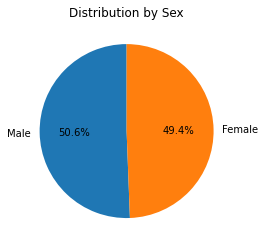

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = mouse["Sex"].value_counts()
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timept = mouse.groupby('Mouse ID')['Timepoint'].max()
max_timept.sort_values().reset_index().rename(columns={'Mouse ID': 'Max Timepoint'})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = mouse.merge(max_timept, on="Mouse ID")
max_merge.rename(columns={"Timepoint_y": "Max Timepoint"})
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drugs:
    #locate each drug from the new dataframe
    df = max_merge.loc[max_merge['Drug Regimen'] == i]
    #make another dataframe, but only take the rows where the Timepoint matches the Max
    time_df = df.loc[df['Timepoint_x'] == df['Timepoint_y']]
    #grab the tumor volumes of each row 
    volumes = time_df["Tumor Volume (mm3)"]
    #apppend the list from earlier with each volume
    tumor_vol.append(volumes)
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {i}: {iqr}')
    # Determine outliers using upper and lower bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {i}: {lower_bound}')
    print(f'Upper Bound for {i}: {upper_bound}')
    
    outliers_count = (volumes.loc[(time_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (time_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {i} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ketapril: 13.152155339999993
Lower Bound for Ketapril: 36.99186244000001
Upper Bound for Ketapril: 89.60048379999998
Number of Ketapril outliers: 0
IQR for Naftisol: 17.484110670000007
Lower Bound for Naftisol: 25.85334408499999
Upper Bound for Naftisol: 95.78978676500002
Number of Naftisol outliers: 0
IQR for Placebo: 15.191386480000006
Lower Bound for Placebo: 30.15582196999999
Upper Bound for Placebo: 90.92136789000001
Number of Placebo outliers: 0
IQR for Propriva: 13.447910629999996
Lower Bound for Propriva: 28.

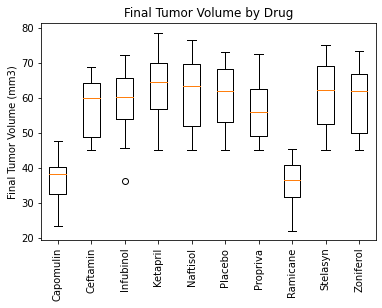

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], drugs, rotation="vertical")

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse x401')

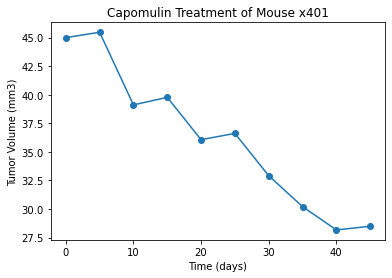

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
thats_cap = mouse.loc[mouse['Mouse ID'] == 'x401']
plt.plot(thats_cap['Timepoint'], thats_cap['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")


Text(0.5, 1.0, 'Average Tumor Volume by Weight')

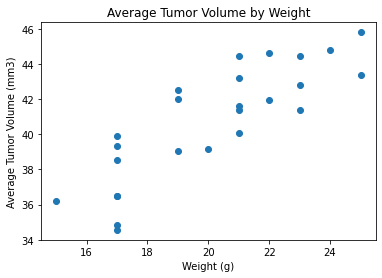

In [143]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
thats_cap_df = mouse.loc[mouse['Drug Regimen'] == 'Capomulin']
#i'm gonna do it all in one line; find the average tumor volume
avg_tum_df = pd.DataFrame(thats_cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
#merge both previous dataframes and drop dupes
avg_tum_df = thats_cap_df.merge(avg_tum_df, on='Mouse ID')
true_avg_tum_df = avg_tum_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
true_avg_tum_df

x = true_avg_tum_df["Weight (g)"]
y = true_avg_tum_df["avg_tumor_vol"]

#scatter plot it
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


Text(20, 37, 'y = 0.95x + 21.55')

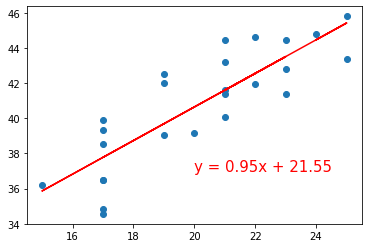

In [147]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
